<a href="https://colab.research.google.com/github/mariamlaagrini/ecommerce-sales-analysis/blob/main/E_commerece_Sales_Data_2024_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load th dataset

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [72]:
product = pd.read_csv('product_details.csv.zip')
customer = pd.read_csv('customer_details.csv')
ecommerce = pd.read_csv('E-commerece sales data 2024.csv')

Queik Review

In [73]:
print(product.shape)
print(customer.shape)
print(ecommerce.shape)

(10002, 28)
(3900, 18)
(3294, 5)


In [74]:
product.head()


,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [75]:
customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [76]:
ecommerce.head()

,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN


EDA

NaN

In [77]:
# Checking the rate of missing values.
print("----- missing-value ratio of product data(%) -----")
mvrp= product.isnull().sum()/product.shape[0]*100
print(mvrp)

----- missing-value ratio of product data(%) -----
Uniqe Id                   0.000000
Product Name               0.000000
Brand Name               100.000000
Asin                     100.000000
Category                   8.298340
Upc Ean Code              99.660068
List Price               100.000000
Selling Price              1.069786
Quantity                 100.000000
Model Number              17.716457
About Product              2.729454
Product Specification     16.316737
Technical Details          7.898420
Shipping Weight           11.377724
Product Dimensions        95.210958
Image                      0.000000
Variants                  75.224955
Sku                      100.000000
Product Url                0.000000
Stock                    100.000000
Product Details          100.000000
Dimensions               100.000000
Color                    100.000000
Ingredients              100.000000
Direction To Use         100.000000
Is Amazon Seller           0.000000
Size Quantity

In [78]:
print("----- missing-value ratio of product data(%) -----")
mvrc= customer.isnull().sum()/customer.shape[0]*100
print(mvrc)

----- missing-value ratio of product data(%) -----
Customer ID               0.0
Age                       0.0
Gender                    0.0
Item Purchased            0.0
Category                  0.0
Purchase Amount (USD)     0.0
Location                  0.0
Size                      0.0
Color                     0.0
Season                    0.0
Review Rating             0.0
Subscription Status       0.0
Shipping Type             0.0
Discount Applied          0.0
Promo Code Used           0.0
Previous Purchases        0.0
Payment Method            0.0
Frequency of Purchases    0.0
dtype: float64


In [79]:
print("----- missing-value ratio of product data(%) -----")
mvre= ecommerce.isnull().sum()/ecommerce.shape[0]*100
print(mvre)

----- missing-value ratio of product data(%) -----
user id               8.955677
product id            8.955677
Interaction type     12.841530
Time stamp            8.955677
Unnamed: 4          100.000000
dtype: float64


Check Duplication

In [80]:
duplicate_rows_ecommerce = ecommerce[ecommerce.duplicated()]
print("Number of duplicate rows in 'ecommerce':", duplicate_rows_ecommerce.shape[0])

Number of duplicate rows in 'ecommerce': 294


In [81]:
ecommerce['user id'].value_counts()

,count
user id,
1.0,1
2004.0,1
1995.0,1
1996.0,1
1997.0,1
...,...
1003.0,1
1004.0,1
1005.0,1


In [82]:
ecommerce['product id'].value_counts()

,count
product id,
4c69b61db1fc16e7013b43fc926e502d,1
eed93d6ce56aa983fb63a007b70565e0,1
3a96ef043f52d9ea808447783b6d20c5,1
b9b85de6e38cb0153e0a3b2923936153,1
e2cbdaa6b1ee6a738542f730368dc01b,1
...,...
379f542d83d30b9031c51b9418849ec7,1
ec2a6bfae6b2c11ed5ef3a1b1b8012f4,1
6da4bb2fc8c0c4a81c90dafe491cb84e,1


In [83]:
customer['Purchase Amount (USD)'].describe()

,Purchase Amount (USD)
count,3900.000000
mean,59.764359
std,23.685392
min,20.000000
25%,39.000000
50%,60.000000
75%,81.000000
max,100.000000


In [84]:
customer['Previous Purchases'].describe()

,Previous Purchases
count,3900.000000
mean,25.351538
std,14.447125
min,1.000000
25%,13.000000
50%,25.000000
75%,38.000000
max,50.000000


Data Processing & Analysing


In [85]:
#Removing columns with more than 75% NaN
columns_to_drop = [col for col in product.columns if mvrp[col] > 75]
product = product.drop(columns=columns_to_drop, errors='ignore')
product.shape

(10002, 12)

In [86]:
product.dropna(inplace=True)
product.shape

(7004, 12)

In [87]:
columns_to_drop = [col for col in ecommerce.columns if mvre[col] > 75]
ecommerce = ecommerce.drop(columns=columns_to_drop, errors='ignore')
ecommerce.shape

(3294, 4)

In [88]:
ecommerce.dropna(inplace=True)
ecommerce.shape

(2871, 4)

In [89]:
# Drop unnecesarry columns
product=product.drop(['Model Number', 'About Product', 'Image','Product Url','Product Specification'], axis=1)

In [90]:
customer=customer.drop(['Size','Color','Payment Method'], axis=1)

In [91]:
ecommerce=ecommerce.drop(['Time stamp'], axis=1)

In [92]:
product= product.rename(columns={'uniqe id': 'product id'})

In [93]:
#remove $ frome Selling price and convert it to numeric
product['Selling Price'] = product['Selling Price'].str.replace('$', '', regex=False)
product['Selling Price'] = product['Selling Price'].str.replace(' ', '', regex=False) # Remove spaces
product['Selling Price'] = product['Selling Price'].str.replace(r'\s+', '', regex=True) # Remove extra whitespace
product['Selling Price'] = product['Selling Price'].str.replace(r'\.{2,}', '.', regex=True) # Replace multiple decimal points with a single one
product['Selling Price'] = pd.to_numeric(product['Selling Price'], errors='coerce')

In [94]:
#Converts weight to ounces if in pounds in Shipping weight column
def convert_weight(weight):
    """Converts weight to ounces if in pounds, otherwise keeps it as is."""
    try:
        if pd.isna(weight):
            return None

        weight = str(weight).lower()

        if "lb" in weight or "pound" in weight:
            num = float(weight.split()[0])
            return num * 16

        if "oz" in weight or "ounce" in weight:
            num = float(weight.split()[0])
            return num

        return float(weight)

    except ValueError:
        return None

# Apply to column
product["Shipping Weight ounces"] = product["Shipping Weight"].apply(convert_weight)


In [95]:
product['Selling Price'].describe()

,Selling Price
count,6852.000000
mean,33.351767
std,64.472667
min,0.010000
25%,9.990000
50%,16.705000
75%,29.407500
max,945.990000


Identify the Most Valuable Customers (Who Spends the Most?)

In [110]:
top_10_purchase_amount = customer.sort_values(by=['Purchase Amount (USD)'], ascending=False).head(10)
top_10_previous_purchases = customer.sort_values(by=['Previous Purchases'], ascending=False).head(10)
weekly_customers = customer[customer['Frequency of Purchases'] == 'Weekly']

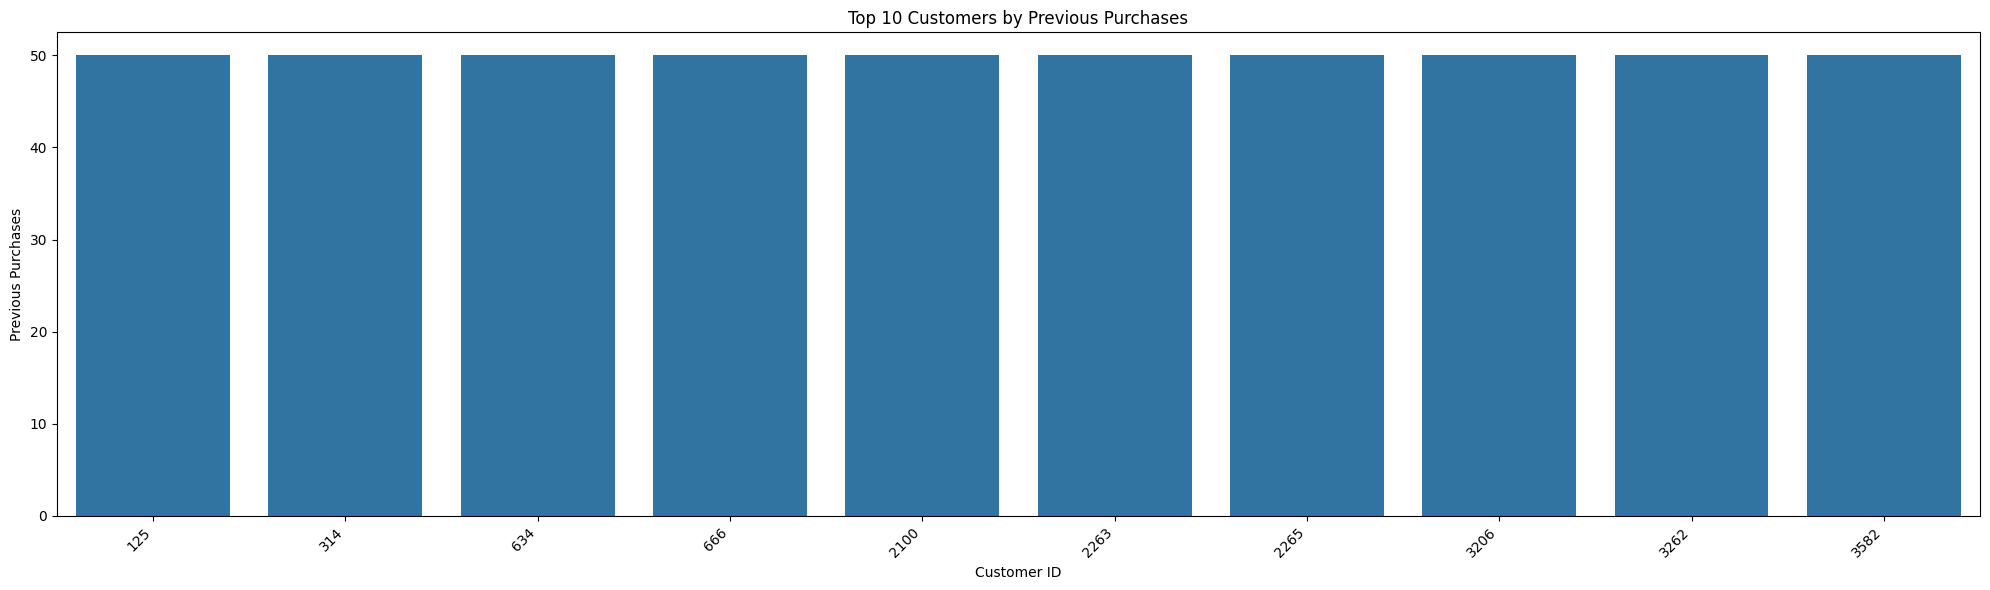

In [112]:
#top 10 customer based on previous perchases
plt.figure(figsize=(20, 6))
sns.barplot(x='Customer ID', y='Previous Purchases', data=top_10_previous_purchases)
plt.title('Top 10 Customers by Previous Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Previous Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [111]:
top_10_weekly_customers = weekly_customers.sort_values(by=['Previous Purchases'], ascending=False).head(10)
print(top_10_weekly_customers)

      Customer ID  Age  Gender Item Purchased     Category  \
992           993   46    Male         Jacket    Outerwear   
290           291   58    Male        T-shirt     Clothing   
1521         1522   29    Male       Backpack  Accessories   
140           141   63    Male          Shirt     Clothing   
2445         2446   63    Male          Scarf  Accessories   
2288         2289   28    Male        Jewelry  Accessories   
3261         3262   48  Female           Belt  Accessories   
2059         2060   56    Male         Shorts     Clothing   
1850         1851   51    Male         Gloves  Accessories   
1295         1296   30    Male       Sneakers     Footwear   

      Purchase Amount (USD)        Location  Season  Review Rating  \
992                      99       Louisiana  Winter            4.6   
290                      33        Colorado  Winter            3.7   
1521                     59      Washington  Summer            2.7   
140                      28  North Ca

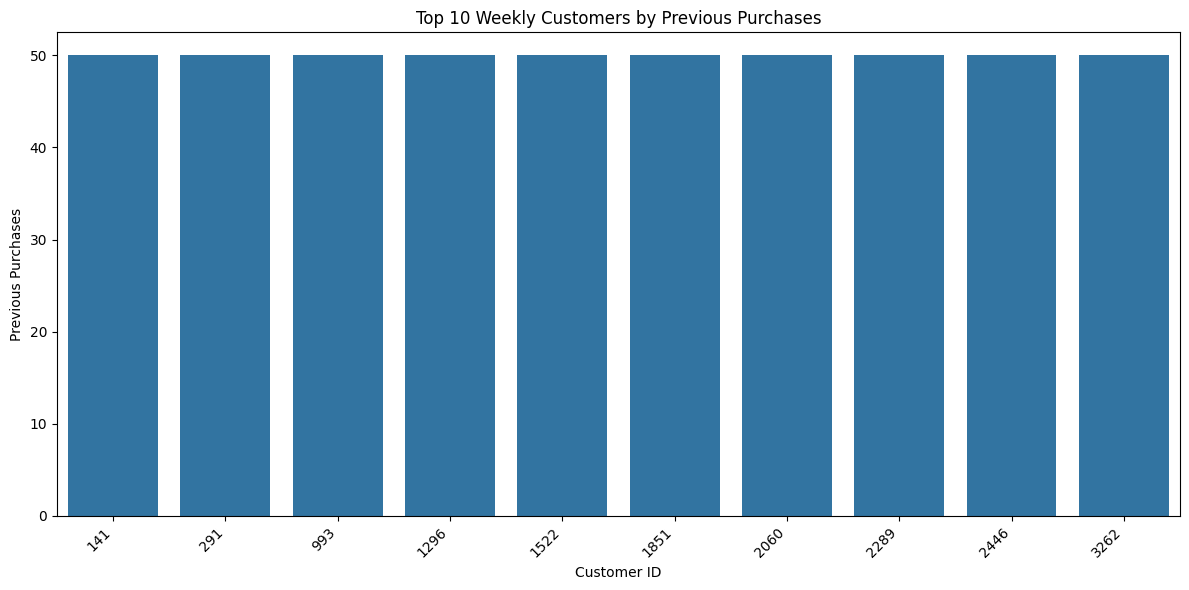

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='Previous Purchases', data=top_10_weekly_customers)
plt.title('Top 10 Weekly Customers by Previous Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Previous Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [97]:
#top 10 customers based on purchase amount and previous purchases
top_10_purchase_amount_ids = top_10_purchase_amount['Customer ID'].tolist()
top_10_previous_purchases_ids = top_10_previous_purchases['Customer ID'].tolist()
top_customers_ids = list(set(top_10_purchase_amount_ids) & set(top_10_previous_purchases_ids))
top_customers = customer[customer['Customer ID'].isin(top_customers_ids)]
top_customers

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases


Are most customers one-time buyers, or do they come back?

In [99]:
filtered_customers = customer[customer['Previous Purchases'] > 5]
portion = len(filtered_customers) / len(customer)


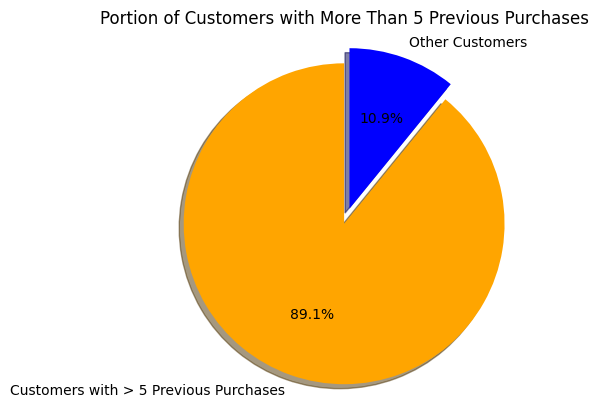

In [100]:
labels = ['Customers with > 5 Previous Purchases', 'Other Customers']
sizes = [portion, 1 - portion]  # portion is already calculated
colors = ['orange', 'blue']  # Colors for the slices
explode = (0.1, 0)  # Explode the first slice (Customers with > 5 Previous Purchases)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Portion of Customers with More Than 5 Previous Purchases')
plt.show()

In [101]:
customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,3.1,Yes,Express,Yes,Yes,14,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,3.1,Yes,Express,Yes,Yes,2,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,Annually


What Do Customers Buy Most Often? (Item Preferences)

In [102]:
top_10_products = customer['Item Purchased'].value_counts().head(10)
top_10_products

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Belt,161
Sunglasses,161


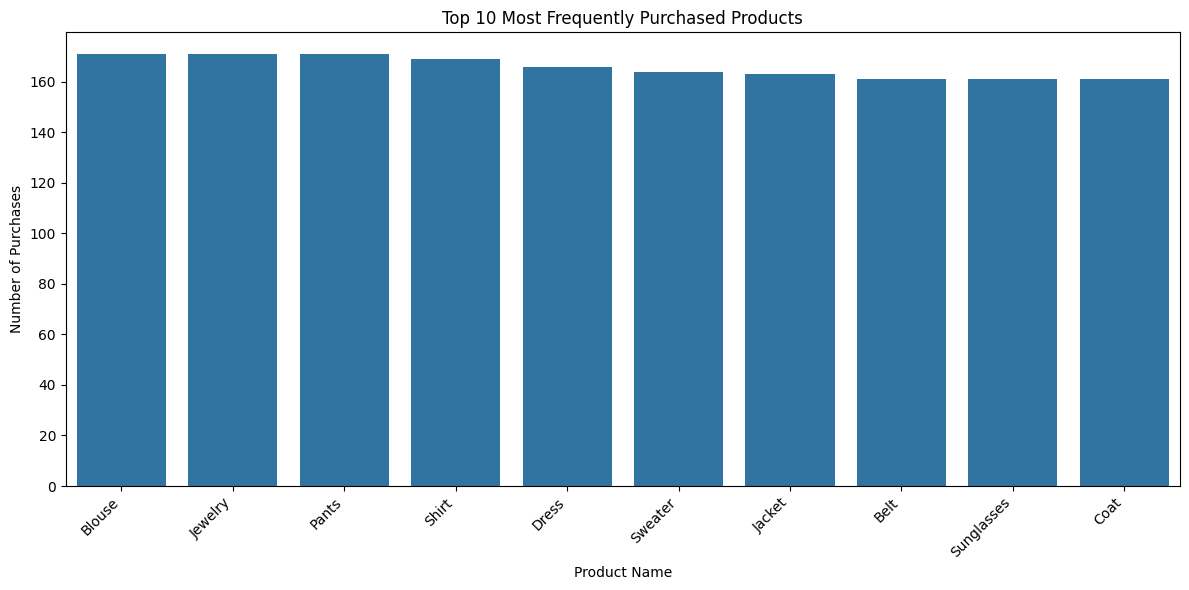

In [103]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

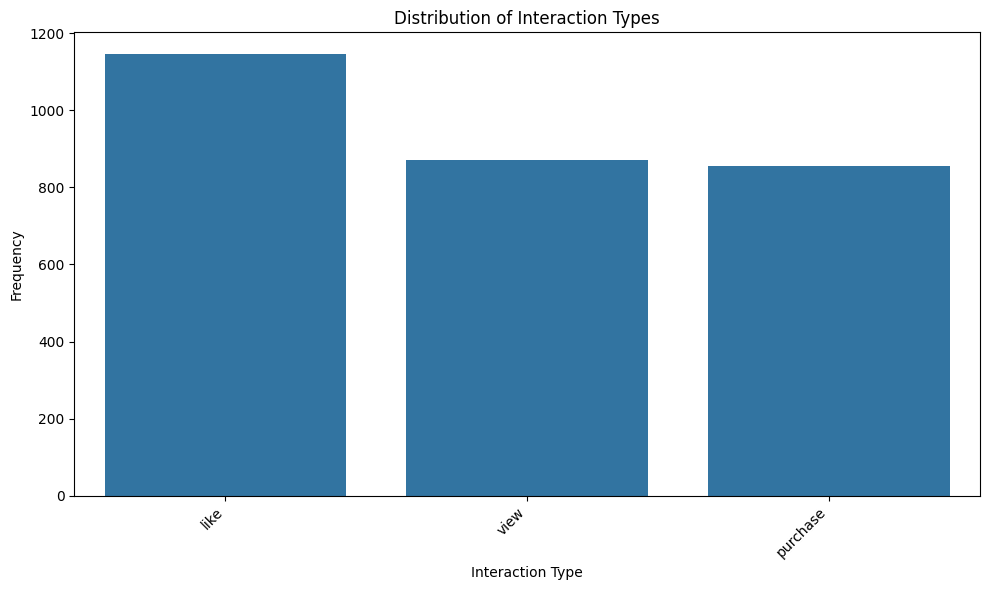

In [117]:
   interaction_counts= ecommerce['Interaction type'].value_counts()
   plt.figure(figsize=(10, 6))
   sns.barplot(x=interaction_counts.index, y=interaction_counts.values)
   plt.title('Distribution of Interaction Types')
   plt.xlabel('Interaction Type')
   plt.ylabel('Frequency')
   plt.xticks(rotation=45, ha='right')
   plt.tight_layout()
   plt.show()

When Do Customers Buy? (Purchase Timing & Trends)

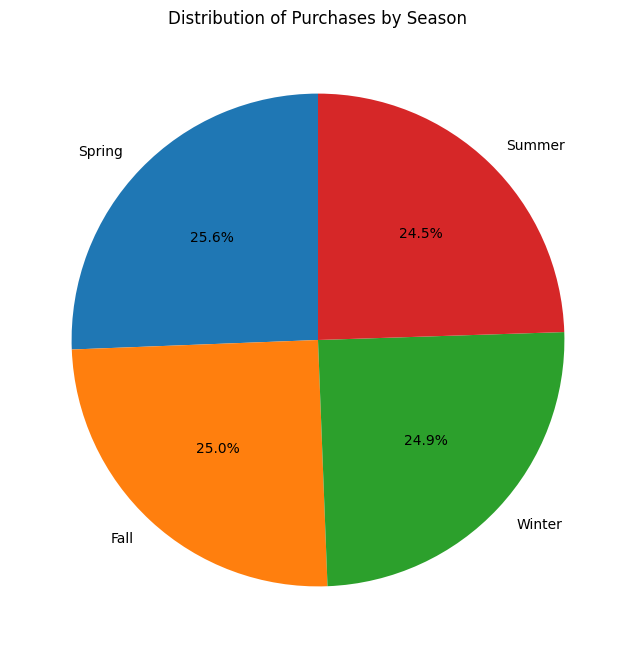

In [106]:
season_counts = customer['Season'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Purchases by Season')
plt.show()

Frequency of Purchases

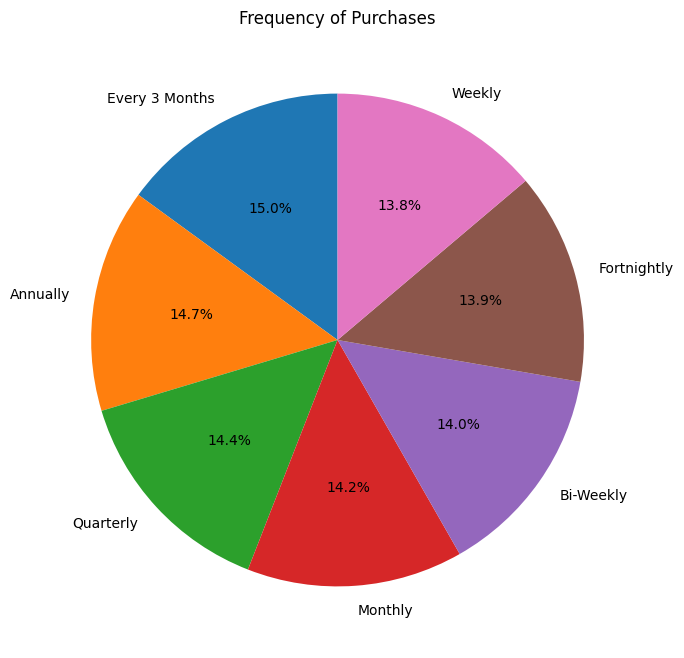

In [118]:
freq=customer['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Frequency of Purchases')
plt.show()

 Do Discounts or Low Prices Influence Customers?


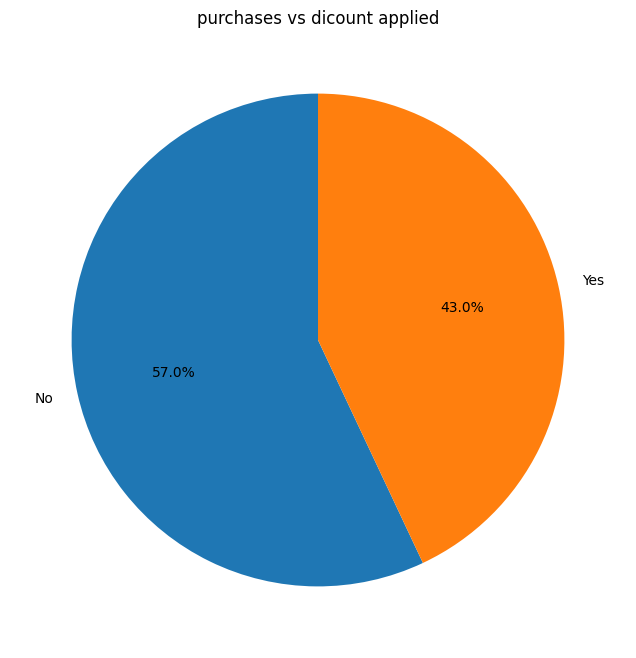

In [108]:
dis=customer['Discount Applied'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(dis, labels=dis.index, autopct='%1.1f%%', startangle=90)
plt.title('purchases vs dicount applied')
plt.show()